# Indoor localization

An indoor positioning system (IPS) is a system to locate objects or people inside a building using radio waves, magnetic fields, acoustic signals, or other sensory information collected by mobile devices. There are several commercial systems on the market, but there is no standard for an IPS system.

IPSes use different technologies, including distance measurement to nearby anchor nodes (nodes with known positions, e.g., WiFi access points), magnetic positioning, dead reckoning. They either actively locate mobile devices and tags or provide ambient location or environmental context for devices to get sensed.

According to the [report](https://www.marketsandmarkets.com/Market-Reports/indoor-positioning-navigation-ipin-market-989.html), the global indoor location market size is expected to grow from USD 7.11 Billion in 2017 to USD 40.99 Billion by 2022, at a Compound Annual Growth Rate (CAGR) of 42.0% during the forecast period. Hassle-free navigation, improved decision-making, and increased adoption of connected devices are boosting the growth of the indoor location market across the globe.

In this problem, you are going to use signals from seven different wi-fi access points to define in which room the user is located.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

## Preprocessing the data

Loading the data and breaking it into training and cross-validation sets.

In [3]:
train_set = pd.read_csv('train_set.csv')
cv_set = pd.read_csv('cv_set.csv')

train_data = train_set[['wifi'+str(i) for i in range(1, len(train_set.columns) - 1)]]
train_labels = train_set['room']
cv_data = cv_set[['wifi'+str(i) for i in range(1, len(cv_set.columns) - 1)]]
cv_labels = cv_set['room']

D_train = xgb.DMatrix(train_data, label=train_labels)
D_test = xgb.DMatrix(cv_data, label=cv_labels)

In [4]:
print(train_data[:10])
print(train_labels[:10])

   wifi1  wifi2  wifi3  wifi4  wifi5  wifi6  wifi7
0    -68    -57    -61    -65    -71    -85    -85
1    -63    -60    -60    -67    -76    -85    -84
2    -61    -60    -68    -62    -77    -90    -80
3    -65    -61    -65    -67    -69    -87    -84
4    -61    -63    -58    -66    -74    -87    -82
5    -62    -60    -66    -68    -80    -86    -91
6    -65    -59    -61    -67    -72    -86    -81
7    -63    -57    -61    -65    -73    -84    -84
8    -66    -60    -65    -62    -70    -85    -83
9    -67    -60    -59    -61    -71    -86    -91
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: room, dtype: int64


In [5]:
print(cv_data[:10])
print(cv_labels[:10])

   wifi1  wifi2  wifi3  wifi4  wifi5  wifi6  wifi7
0    -64    -56    -61    -66    -71    -82    -81
1    -63    -65    -60    -63    -77    -81    -87
2    -64    -55    -63    -66    -76    -88    -83
3    -65    -60    -59    -63    -76    -86    -82
4    -67    -61    -62    -67    -77    -83    -91
5    -61    -59    -65    -63    -74    -89    -87
6    -63    -56    -63    -65    -72    -82    -89
7    -66    -59    -64    -68    -68    -97    -83
8    -67    -57    -64    -71    -75    -89    -87
9    -63    -57    -59    -67    -71    -82    -93
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: room, dtype: int64


In [6]:
train_data.isnull().sum()

wifi1    0
wifi2    0
wifi3    0
wifi4    0
wifi5    0
wifi6    0
wifi7    0
dtype: int64

### Training XGBoost regressor

In [7]:
print("xgboost", xgb.__version__)

xgboost 1.2.1


#### XGBoost Classifier without hyperparamethers

In [40]:
from xgboost.sklearn import XGBClassifier

clf_xgb = XGBClassifier(
    objective='multi:softprob',
    missing=None,
)

clf_xgb.fit(train_data,
            train_labels,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='merror',
            eval_set=[(cv_data, cv_labels)])

[0]	validation_0-merror:0.03526
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.03275
[2]	validation_0-merror:0.03526
[3]	validation_0-merror:0.03275
[4]	validation_0-merror:0.03023
[5]	validation_0-merror:0.02267
[6]	validation_0-merror:0.02267
[7]	validation_0-merror:0.02267
[8]	validation_0-merror:0.02267
[9]	validation_0-merror:0.02015
[10]	validation_0-merror:0.01763
[11]	validation_0-merror:0.02015
[12]	validation_0-merror:0.02015
[13]	validation_0-merror:0.01763
[14]	validation_0-merror:0.02015
[15]	validation_0-merror:0.02015
[16]	validation_0-merror:0.02015
[17]	validation_0-merror:0.02015
[18]	validation_0-merror:0.02015
[19]	validation_0-merror:0.02015
[20]	validation_0-merror:0.02015
Stopping. Best iteration:
[10]	validation_0-merror:0.01763



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

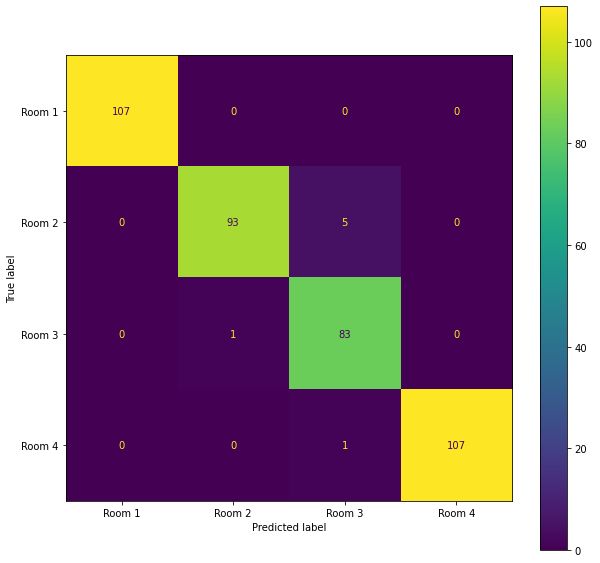

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_xgb,
                     cv_data,
                     cv_labels,
                     values_format='d',
                     display_labels=['Room 1', 'Room 2', 'Room 3', 'Room 4'],
                     ax=ax)
plt.show()

#### Conclusion:
We've got good fit with automatically selected hyperparamethers. Now we would like to see what we get after Cross-Validation.

### Tuning hyperparameters

In [41]:
param_grid = {
    'max_depth': [3, 4, 6],
    'learning_rate': [0.1, 0.01, 0.05], # eta
    'gamma': [0, 0.25, 1.0],
    'tree_method': ['exact', 'auto'],
    'reg_alpha': [0, 1.0, 10.0]
}

optimal_params = GridSearchCV(
    estimator=XGBClassifier(
                    objective='multi:softprob',
                    missing=None,
                    subsample=0.9,
                    colsample_bytree=0.5
    ),
    param_grid=param_grid,
    verbose=2,
    cv=3
)

In [42]:
optimal_params.fit(
            train_data,
            train_labels,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='merror',
            eval_set=[(cv_data, cv_labels)]
            )
print(optimal_params.best_params_)


opt_params = {
    'objective': 'multi:softprob',
    'missing': None,
}
opt_params.update(optimal_params.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.1s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=auto 
[CV]  gam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.1, max_depth=3, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.1, max

[CV]  gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.01, max_depth=3, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=3, 

[CV]  gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.01, max_depth=6, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=0, 

[CV]  gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=exact 
[CV]  gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s
[CV] gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=0, learning_rate=0.05, max_depth=6, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.1, max_depth=3, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=0.25,

[CV]  gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=10.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=10.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.1, max_depth=6, reg_alpha=10.0, tree_method=exact, total=   0.0s

[CV]  gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.01, max_depth=6, reg_alpha=1.0, tree_method=auto, total=

[CV]  gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=0.25, learning_rate=0.05, max_depth=6, reg_alpha=1.0, tree_method=auto, total=   0.

[CV]  gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.1, max_depth=6, reg_alpha=0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.1, m

[CV]  gamma=1.0, learning_rate=0.01, max_depth=4, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.01, max_depth=4, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.01, max_depth=4, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.01, max_depth=4, reg_alpha=10.0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.01, max_depth=4, reg_alpha=10.0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.01, max_depth=6, reg_alpha=0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.01, max_depth=6, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.01, max_depth=6, reg_alpha=0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.01, max_depth=6, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.01, max_depth=6, reg_alpha=0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.01, max_depth=6, reg_alpha=0, tree_method=exact, total=   0.0s
[CV] gamm

[CV]  gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=exact, total=   0.0s
[CV] gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=auto 
[CV]  gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=1.0, tree_method=auto, total=   0.0s
[CV] gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=10.0, tree_method=exact 
[CV]  gamma=1.0, learning_rate=0.05, max_depth=4, reg_alpha=10.0, tree_method=exact, total=   0.0s
[

[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:   12.1s finished


In [43]:
print(opt_params)

optimal_clf_xgb = XGBClassifier(
    **opt_params
)

{'objective': 'multi:softprob', 'missing': None, 'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'reg_alpha': 0, 'tree_method': 'exact'}


In [44]:
optimal_clf_xgb.fit(train_data,
            train_labels,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='merror',
            eval_set=[(cv_data, cv_labels)])

[0]	validation_0-merror:0.03778
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.03778
[2]	validation_0-merror:0.03778
[3]	validation_0-merror:0.03778
[4]	validation_0-merror:0.03526
[5]	validation_0-merror:0.03526
[6]	validation_0-merror:0.03526
[7]	validation_0-merror:0.03275
[8]	validation_0-merror:0.03275
[9]	validation_0-merror:0.03023
[10]	validation_0-merror:0.03023
[11]	validation_0-merror:0.02771
[12]	validation_0-merror:0.02519
[13]	validation_0-merror:0.02267
[14]	validation_0-merror:0.02267
[15]	validation_0-merror:0.02267
[16]	validation_0-merror:0.02267
[17]	validation_0-merror:0.02267
[18]	validation_0-merror:0.02267
[19]	validation_0-merror:0.02267
[20]	validation_0-merror:0.02267
[21]	validation_0-merror:0.02267
[22]	validation_0-merror:0.02267
[23]	validation_0-merror:0.02267
Stopping. Best iteration:
[13]	validation_0-merror:0.02267



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Predict and comapre accuracy

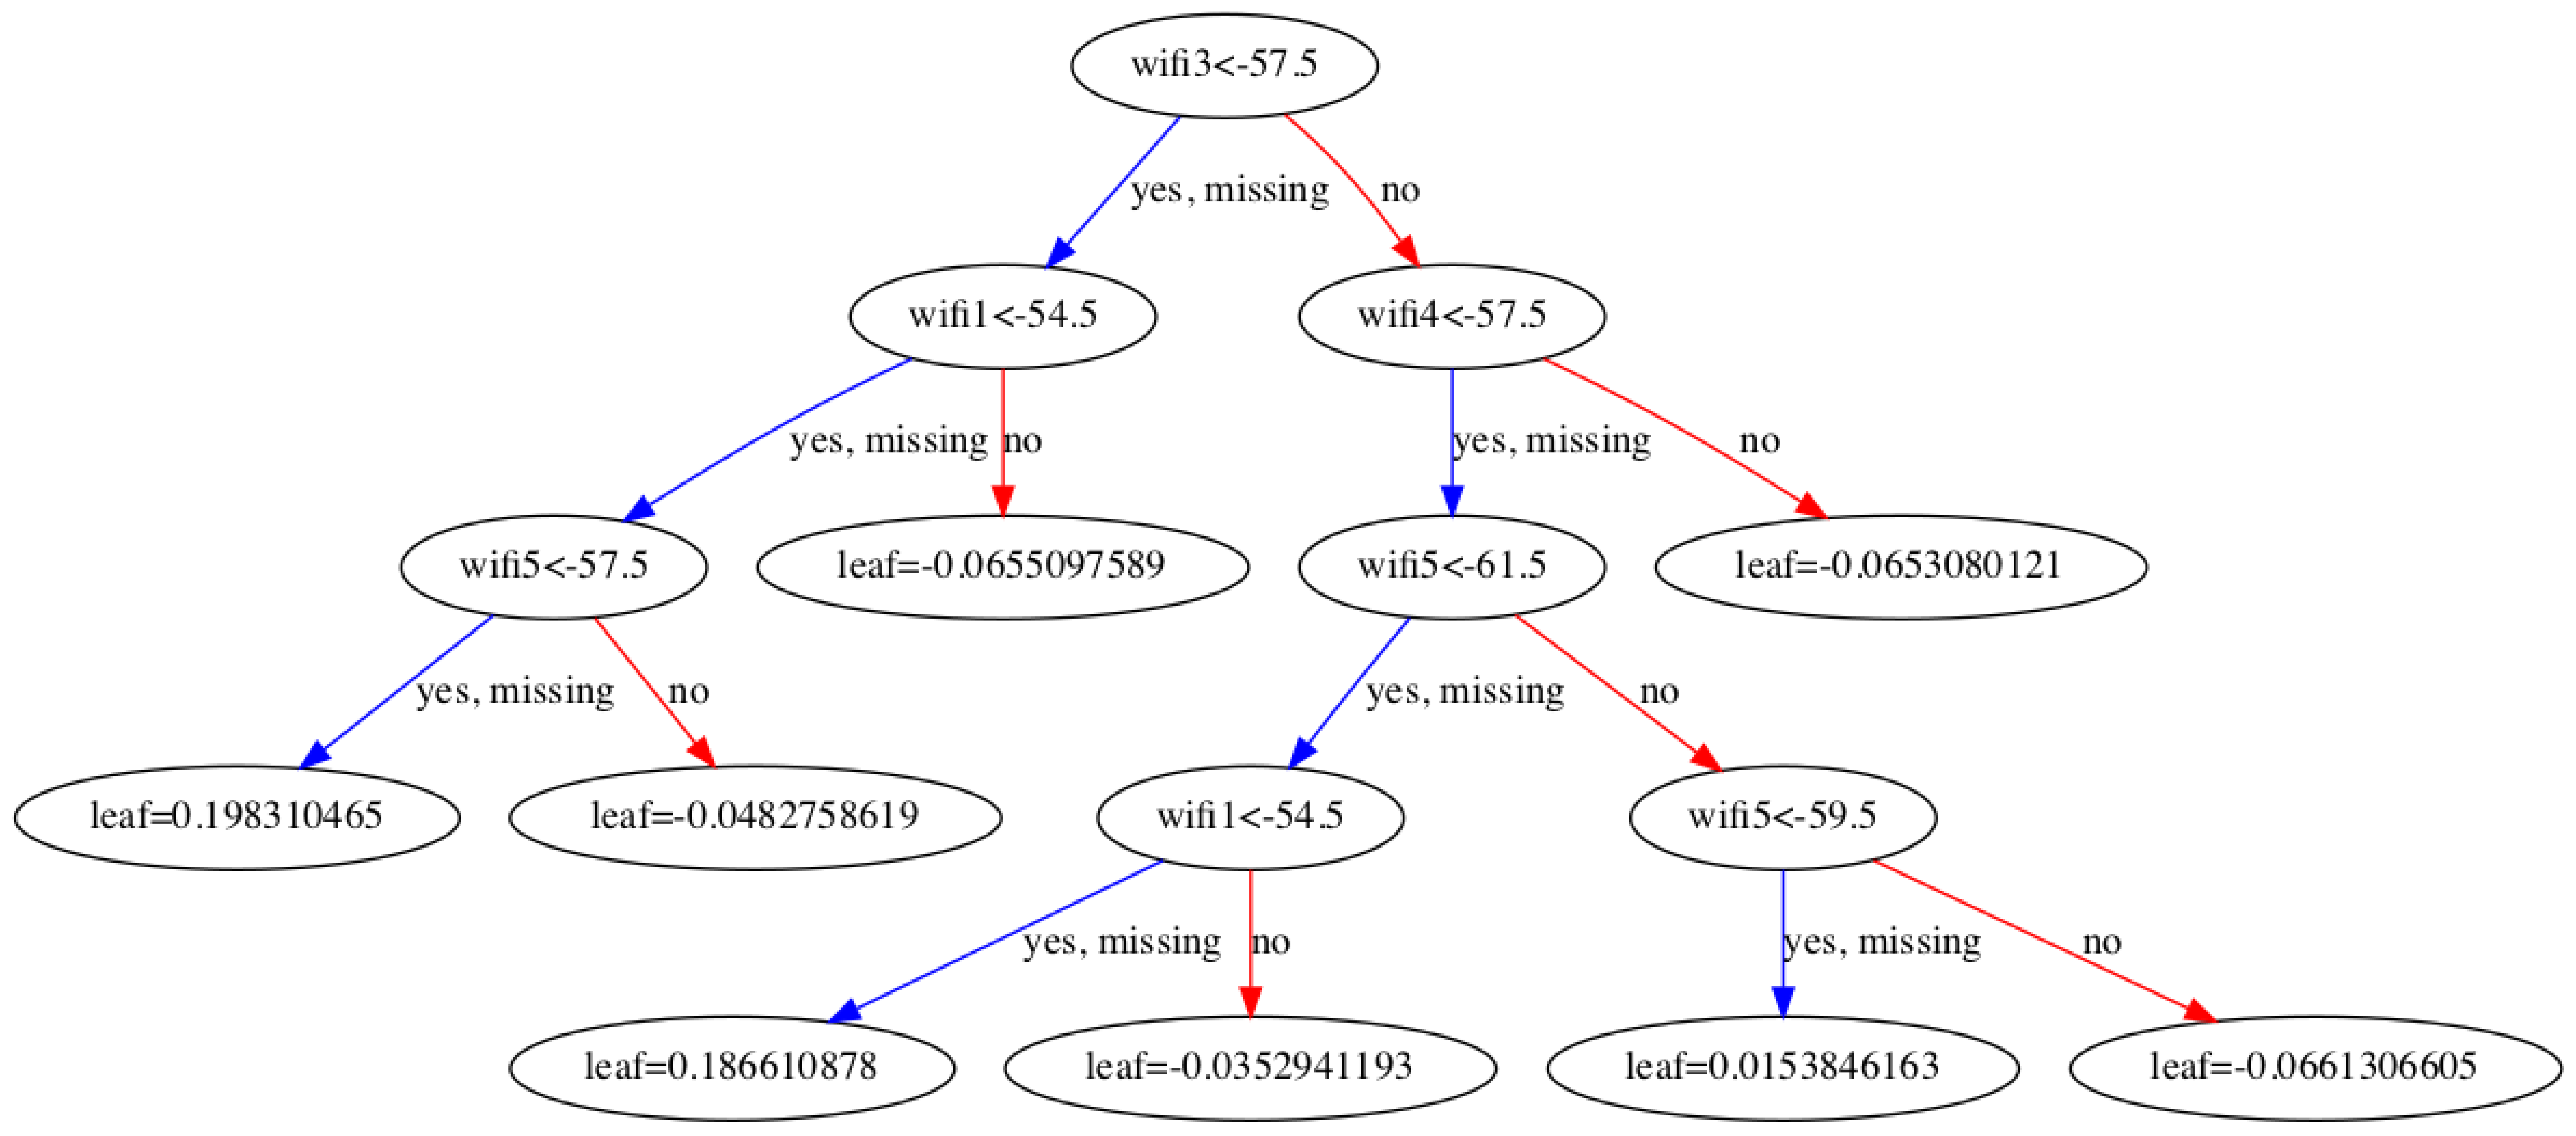

In [45]:
xgb.plot_tree(optimal_clf_xgb,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

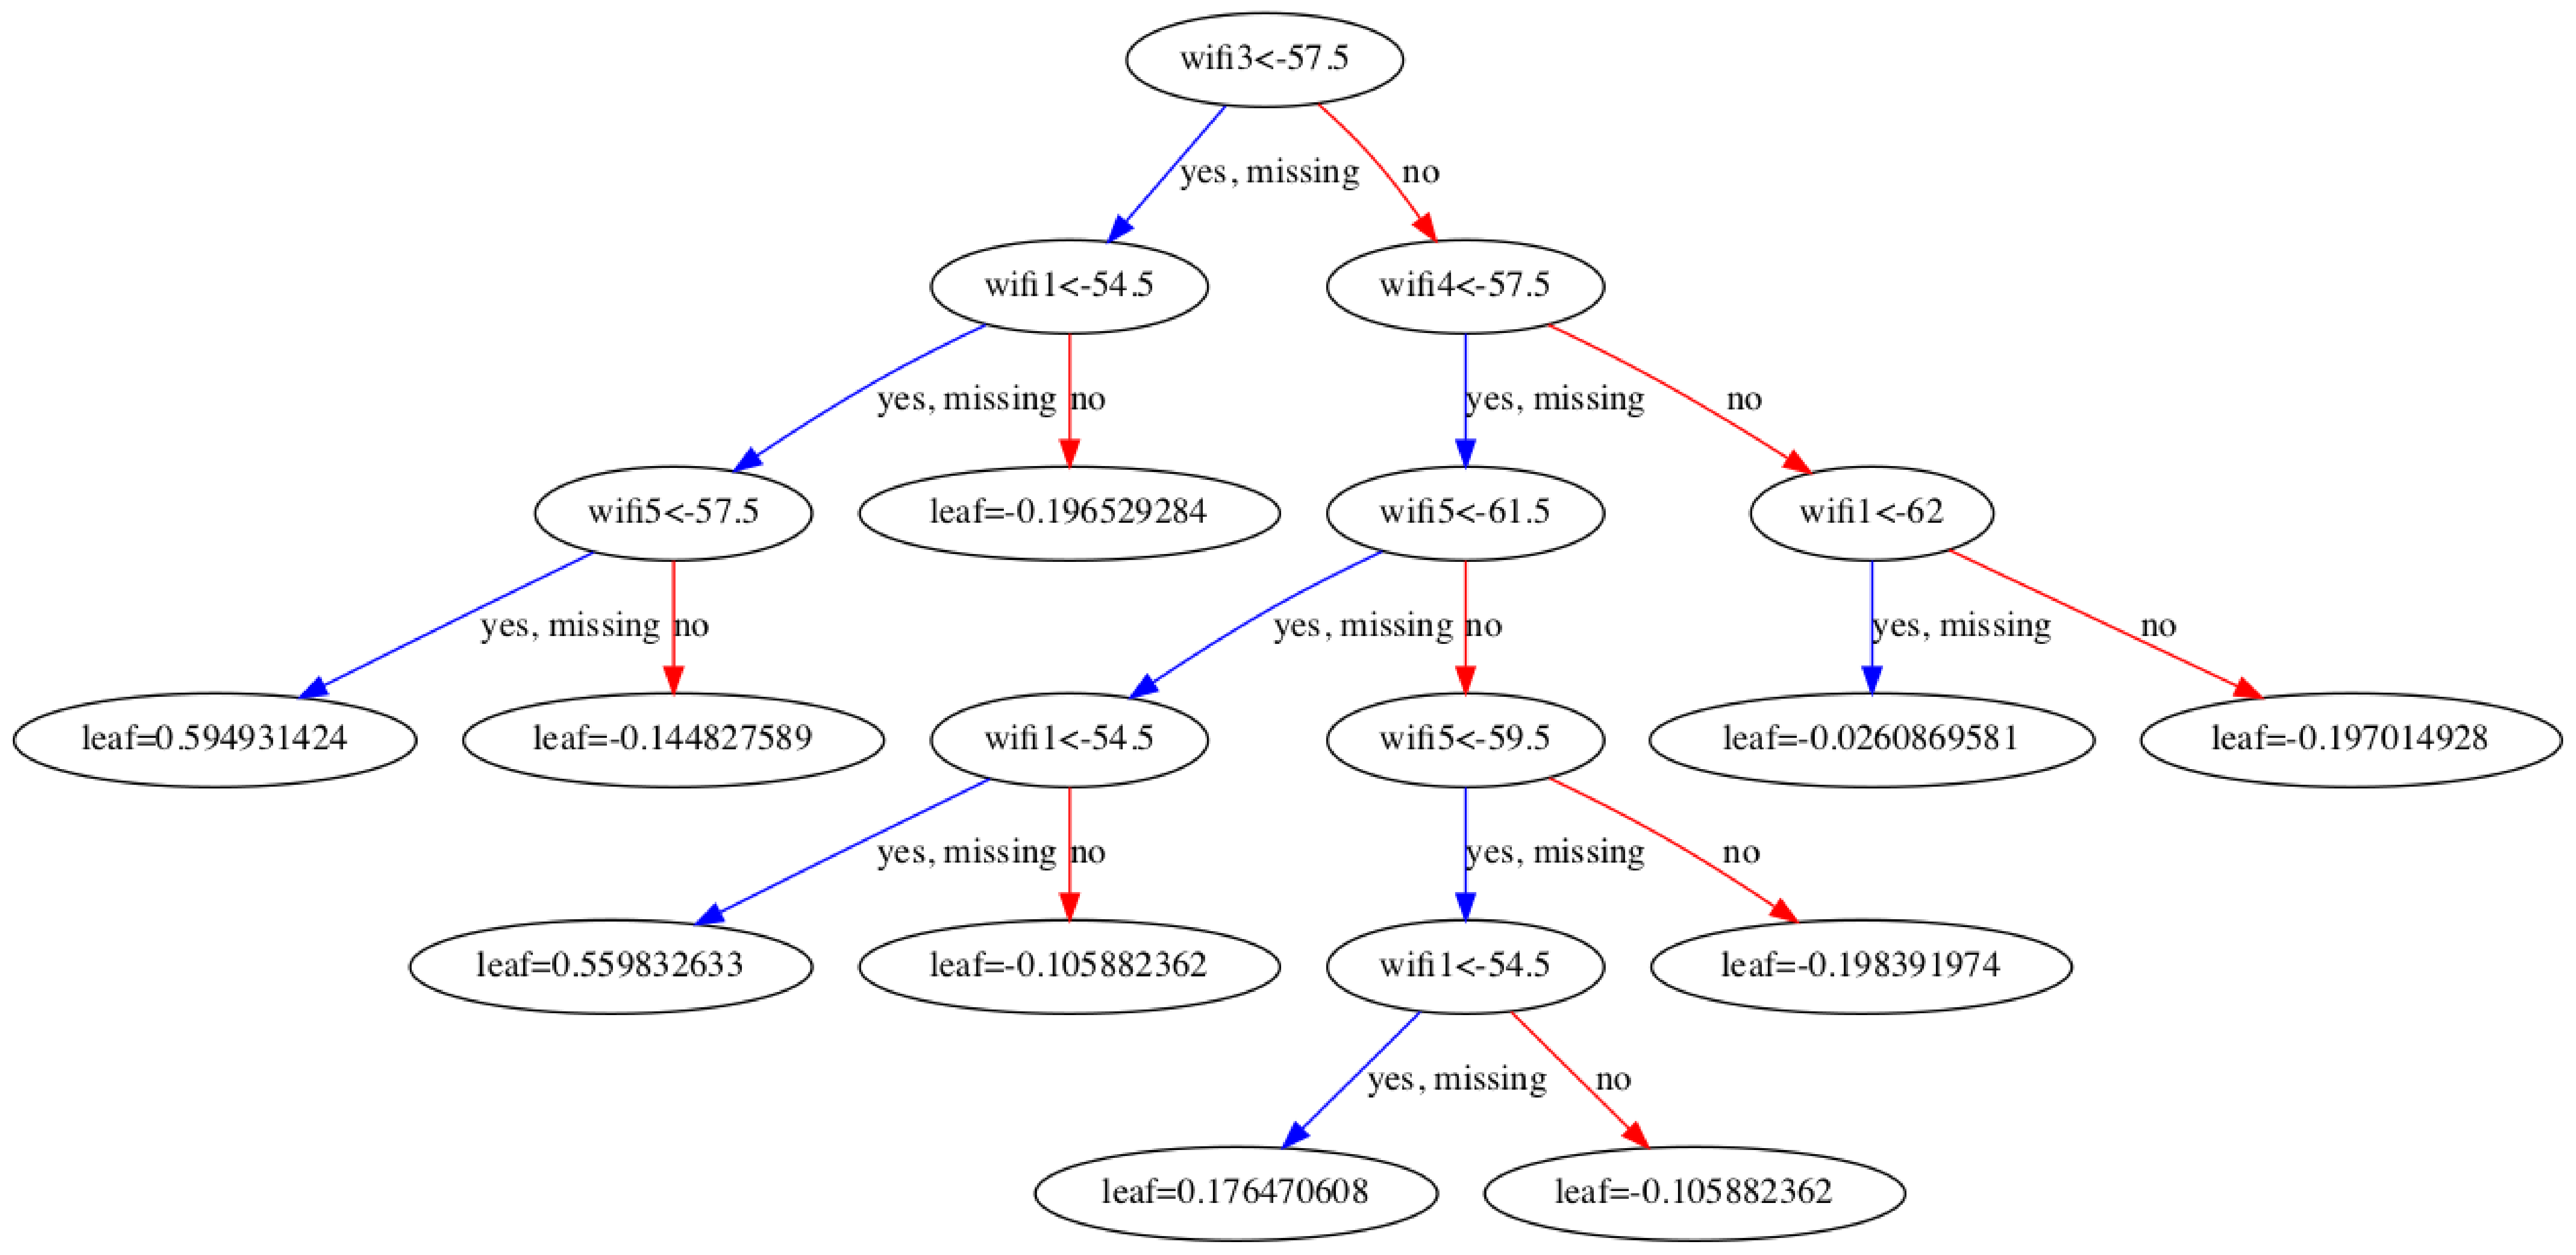

In [46]:
xgb.plot_tree(clf_xgb,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [47]:
y_pred = clf_xgb.predict(cv_data)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(cv_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

y_pred = optimal_clf_xgb.predict(cv_data)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(cv_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.24%
Accuracy: 97.73%


### Conclusions:
We have made a Cross Validation for the dataset and we were supposed to get optimal parameters for the model, however as the dataset is small auto-consideration which value to choose for the hyperparamether won.\
As we can see our Gradient Boosting tree is not that wide as the auto-generated one. The difference is in: `auto and our tree` respectively: `gamma = 0 and gamma = 1`, `eta=0.3 and eta=0.1`.\
Gamma is important in prunning the branch and eta is our regularization paramether. When we do smaller regularization we prune more branches, what we can see with `eta=0.1`.\
For each branch we calculate `Similarity` and then `Gain`, if `Gain - Gamma < 0` we prune the branch.\
So we can see these paramethers really plays a lot.

### Best tunning

In [48]:
best1 = {'objective': 'multi:softprob',
         'missing': None,
         'gamma': 0.0,
         'learning_rate': 0.5,
         'max_depth': 3,
         'reg_alpha': 0,
         'tree_method': 'exact'
        }

best_clf_xgb1 = XGBClassifier(
    **best1
)

In [49]:
best_clf_xgb1.fit(train_data,
            train_labels,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='merror',
            eval_set=[(cv_data, cv_labels)])

[0]	validation_0-merror:0.04282
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.03275
[2]	validation_0-merror:0.03023
[3]	validation_0-merror:0.02519
[4]	validation_0-merror:0.02519
[5]	validation_0-merror:0.02771
[6]	validation_0-merror:0.02267
[7]	validation_0-merror:0.02015
[8]	validation_0-merror:0.01763
[9]	validation_0-merror:0.01511
[10]	validation_0-merror:0.01008
[11]	validation_0-merror:0.01511
[12]	validation_0-merror:0.01259
[13]	validation_0-merror:0.01259
[14]	validation_0-merror:0.01008
[15]	validation_0-merror:0.01008
[16]	validation_0-merror:0.01259
[17]	validation_0-merror:0.01259
[18]	validation_0-merror:0.01511
[19]	validation_0-merror:0.01008
[20]	validation_0-merror:0.01008
Stopping. Best iteration:
[10]	validation_0-merror:0.01008



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
best2 = {'objective': 'multi:softprob',
         'missing': None,
         'gamma': 0.0,
         'learning_rate': 0.6,
         'max_depth': 3,
         'reg_alpha': 1,
         'tree_method': 'auto'
        }

best_clf_xgb2 = XGBClassifier(
    **best2
)

best_clf_xgb2.fit(train_data,
            train_labels,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='merror',
            eval_set=[(cv_data, cv_labels)])

[0]	validation_0-merror:0.04534
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.03778
[2]	validation_0-merror:0.02267
[3]	validation_0-merror:0.02519
[4]	validation_0-merror:0.02015
[5]	validation_0-merror:0.02267
[6]	validation_0-merror:0.02015
[7]	validation_0-merror:0.01763
[8]	validation_0-merror:0.01763
[9]	validation_0-merror:0.01259
[10]	validation_0-merror:0.01259
[11]	validation_0-merror:0.01259
[12]	validation_0-merror:0.01259
[13]	validation_0-merror:0.01259
[14]	validation_0-merror:0.01008
[15]	validation_0-merror:0.01259
[16]	validation_0-merror:0.01008
[17]	validation_0-merror:0.01008
[18]	validation_0-merror:0.01259
[19]	validation_0-merror:0.01259
[20]	validation_0-merror:0.01008
[21]	validation_0-merror:0.01259
[22]	validation_0-merror:0.01259
[23]	validation_0-merror:0.01259
[24]	validation_0-merror:0.01259
Stopping. Best iteration:
[14]	validation_0-merror:0.01008



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)

In [51]:
y_pred = best_clf_xgb1.predict(cv_data)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(cv_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

y_pred = best_clf_xgb2.predict(cv_data)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(cv_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.99%
Accuracy: 98.99%


### Best solutions:
Above we can see our best solutions. The accuracy is 98.99%, here we increased learning rate to remove less branches, and made the depth of the tree to be smaller.